In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/Zoo.csv")

In [4]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
df.describe(include=object)

,animal name
count,101
unique,100
top,frog
freq,2


In [6]:
df.dtypes

,0
animal name,object
hair,int64
feathers,int64
eggs,int64
milk,int64
airborne,int64
aquatic,int64
predator,int64
toothed,int64
backbone,int64


In [7]:
df.duplicated().sum()

0

In [8]:
df.isna()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isna().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


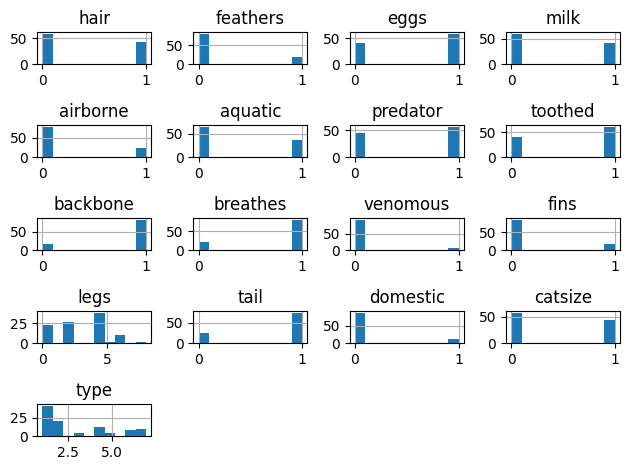

In [12]:
import matplotlib.pyplot as plt
df.hist()
plt.tight_layout()

<Axes: >

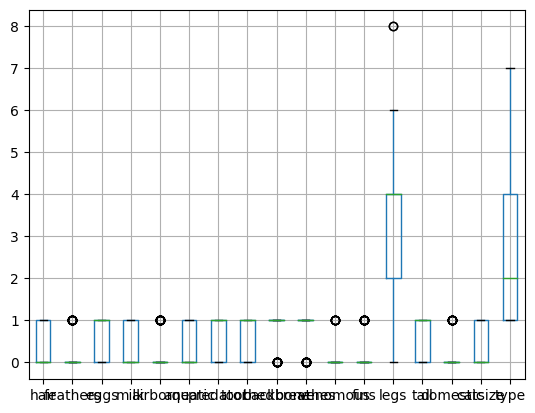

In [11]:
df.boxplot()

In [13]:
from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [14]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [21]:
df.drop(columns=['animal name'],inplace=True)

In [22]:
array = df.values

In [25]:
X = array[:, 0:16]
Y = array[:, 16]

In [26]:
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]])

In [27]:
#Apply minmax scaling
X=(X-X.min())/(X.max())-X.min()

In [28]:
num_folds = 10
kfold = KFold(n_splits=num_folds)

In [29]:
model = KNeighborsClassifier(n_neighbors=7)
results = cross_val_score(model, X, Y, cv=kfold)

In [30]:
results

array([1. , 0.6, 0.8, 1. , 0.9, 0.9, 0.8, 0.5, 0.8, 0.9])

In [31]:
print(results.mean())

0.82



### **Grid Search Algorithm for Hyperparameter Tuning**

In [32]:
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [33]:
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [34]:
array = df.values
X = array[:, 0:16]
Y = array[:, 16]

In [35]:
#Apply minmax scaling
X=(X-X.min())/(X.max())-X.min()

In [36]:
n_neighbors = np.array([2*i+1 for i in range(0,20)])
param_grid = dict(n_neighbors=n_neighbors)

In [37]:
param_grid

{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39])}

In [38]:
n_neighbors

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])

In [39]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [40]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


In [42]:
# search for an optimal value of K for KNN

k_range = range(1, 41)
k_scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X, Y, cv=kfold, scoring='accuracy')
  k_scores.append(scores.mean())

pd.Series(k_scores).sort_values(ascending=False)

,0
0,0.980000
2,0.940000
1,0.940000
3,0.920000
4,0.880000
5,0.860000
6,0.820000
14,0.780000
19,0.780000
18,0.780000


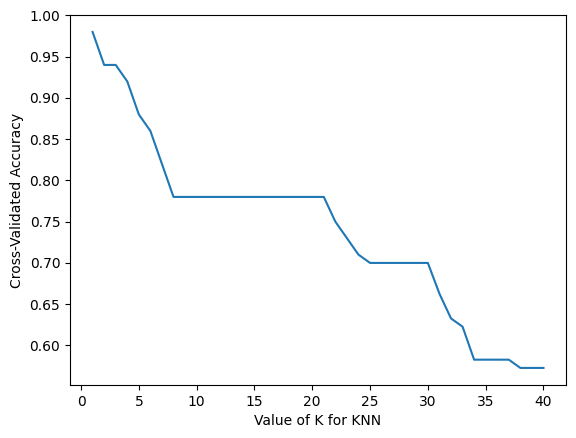

In [43]:
import matplotlib.pyplot as plt

# plot to see clearly
plt.plot(k_range, k_scores)

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### **Interview Questions:**


### **1. What are the key hyperparameters in KNN?**

In K-Nearest Neighbors (KNN), the key hyperparameters include:

1. **Number of Neighbors (k)**:
   - This is the number of nearest neighbors to consider when making a prediction. A small value of \( k \) (e.g., 1) can lead to a highly flexible model that may overfit, while a larger \( k \) smooths the decision boundary, making the model more general.

2. **Distance Metric**:
   - KNN uses a distance metric to find the closest neighbors. Common metrics include:
     - **Euclidean distance**: \( d(p, q) = \sqrt{\sum (p_i - q_i)^2} \)
     - **Manhattan distance**: \( d(p, q) = \sum |p_i - q_i| \)
     - **Minkowski distance**: Generalization of Euclidean and Manhattan distances.
   - The choice of distance metric can affect the performance based on the data distribution.

3. **Weighting Function**:
   - Determines how the neighbors contribute to the final decision. Two common weighting schemes:
     - **Uniform weighting**: All neighbors have equal influence.
     - **Distance weighting**: Closer neighbors have more influence (e.g., weights inversely proportional to the distance).

4. **Algorithm for Neighbor Search**:
   - KNN can use different algorithms to speed up neighbor search:
     - **Brute-force**: Compute the distance from the test point to all training points.
     - **KD-Tree** or **Ball Tree**: Efficient tree-based search structures that speed up querying for nearest neighbors.

5. **Leaf Size** (for tree-based methods):
   - If using KD-Tree or Ball Tree, the leaf size controls the number of points at which the algorithm switches from tree-based search to brute-force. Smaller leaf sizes can lead to faster searches but may also lead to increased memory usage.

6. **p for Minkowski Distance**:
   - If using Minkowski distance as the distance metric, this parameter determines the power of the distance calculation. For example, \( p=1 \) gives the Manhattan distance, and \( p=2 \) gives the Euclidean distance.

Tuning these hyperparameters can help optimize the performance of the KNN model for a specific dataset.

### **2. What distance metrics can be used in KNN?**

In K-Nearest Neighbors (KNN), several distance metrics can be used to compute the similarity between data points. The choice of distance metric affects how "closeness" is determined. Here are the most common distance metrics used in KNN:

### 1. **Euclidean Distance** (L2 Norm)
   - **Formula**:  
     \[
     d(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}
     \]
   - This is the most commonly used metric. It calculates the straight-line (or geometric) distance between two points in Euclidean space.

### 2. **Manhattan Distance** (L1 Norm, or City Block Distance)
   - **Formula**:  
     \[
     d(p, q) = \sum_{i=1}^{n} |p_i - q_i|
     \]
   - This metric computes the distance by summing the absolute differences between the coordinates of the points. It's like navigating a grid-based path (hence "city block").

### 3. **Minkowski Distance**
   - **Formula**:  
     \[
     d(p, q) = \left( \sum_{i=1}^{n} |p_i - q_i|^p \right)^{\frac{1}{p}}
     \]
   - This is a generalized form of both Euclidean and Manhattan distances. By adjusting the parameter \( p \), you can get:
     - **p = 1**: Manhattan distance
     - **p = 2**: Euclidean distance
     - **p > 2**: Higher-order distances (e.g., Chebyshev distance when \( p \to \infty \)).

### 4. **Chebyshev Distance** (L∞ Norm)
   - **Formula**:  
     \[
     d(p, q) = \max_{i=1}^{n} |p_i - q_i|
     \]
   - This metric computes the maximum absolute difference between coordinates of the points. It’s useful when the movement is restricted in grid-like environments.

### 5. **Hamming Distance**
   - **Formula**:  
     \[
     d(p, q) = \sum_{i=1}^{n} (p_i \neq q_i)
     \]
   - This metric counts the number of positions where the corresponding elements of two points differ. It’s mostly used for categorical or binary data.

### 6. **Cosine Similarity (Cosine Distance)**
   - **Formula**:  
     \[
     \text{cos}(p, q) = \frac{p \cdot q}{\|p\| \|q\|}
     \]
   - **Cosine distance** is derived from cosine similarity and is often used in high-dimensional spaces:
     \[
     d(p, q) = 1 - \cos(p, q)
     \]
   - It measures the angle between two vectors rather than their Euclidean distance, which is especially useful in text and document analysis.

### 7. **Mahalanobis Distance**
   - **Formula**:  
     \[
     d(p, q) = \sqrt{(p - q)^T \Sigma^{-1} (p - q)}
     \]
   - This metric considers the correlations between variables by calculating the distance relative to the data distribution’s covariance matrix (\( \Sigma \)). It’s useful when data dimensions have different scales or are correlated.

### 8. **Jaccard Distance**
   - **Formula**:  
     \[
     d(p, q) = 1 - \frac{|p \cap q|}{|p \cup q|}
     \]
   - Jaccard distance is often used for binary or categorical data, and it measures the dissimilarity between two sets by comparing their shared elements relative to their union.

Each distance metric has its strengths and is more suitable for different types of data and problem contexts. The best choice often depends on the specific dataset and application.